In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

We would like to uncover trends in song / artist popularity using exploratory data analysis techniques with the  Billboard “The Hot 100” dataset. Specifically, we will identify: 
<li>What are the most popular songs?
<li>Who are the top singers?
<li>How has the popularity changed over time?
<li>The relationship between weeks on board and the popularity of artists


# Data Preprocessing

Import the data

In [2]:
charts = pd.read_csv('datasets/charts.csv') 
charts.head()

,rank,song,artist,last-week,peak-rank,weeks-on-board,date
0,1,Butter,BTS,1.0,1,7,2021-07-17
1,2,Good 4 U,Olivia Rodrigo,2.0,1,8,2021-07-17
2,3,Levitating,Dua Lipa Featuring DaBaby,4.0,2,40,2021-07-17
3,4,Kiss Me More,Doja Cat Featuring SZA,3.0,3,13,2021-07-17
4,5,Montero (Call Me By Your Name),Lil Nas X,8.0,1,15,2021-07-17


Check if there's any missing value in the dataframe

In [3]:
charts.isnull().sum()

rank                  0
song                  0
artist                0
last-week         32065
peak-rank             0
weeks-on-board        0
date                  0
dtype: int64

Fortunately there is only 1 column with missing values, however the number of missing values in this column is too large and a simple fill may not be appropriate. We will just drop this column instead. 

In [4]:
charts = charts.drop('last-week',axis=1)

# Data Analysis

What are the most popular songs?

Who are the top singers?

In [5]:
charts['artist'].value_counts(sort=True)[:5]

Taylor Swift     1022
Elton John        889
Madonna           857
Kenny Chesney     758
Drake             751
Name: artist, dtype: int64

In [6]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_34359/2583796055.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  charts["artist"] = charts["artist"].str.replace('\$\$','\\$\\$')


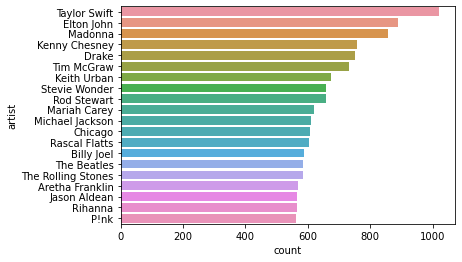

In [7]:
charts["artist"] = charts["artist"].str.replace('\$\$','\\$\\$')
ax = sns.countplot(y="artist", data=charts, order=charts.artist.value_counts().iloc[:20].index)

Most frequent artist... But is that true?

In [8]:
# Uncomment and run following line if needed
# ! pip install nltk
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords

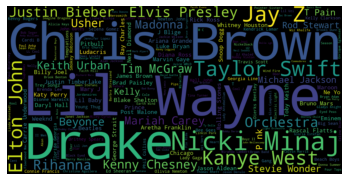

In [12]:
stop_words = ["Featuring", 'X','&',"+"] + list(STOPWORDS)
wordcloud2 = WordCloud(stopwords=stop_words,width=1600, height=800).generate(' '.join(charts['artist'].tolist()))
# Display the generated image:
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis("off")
plt.show()

In fact, there are lots of song have multiple artist showing as "Maroon 5 Featuring Megan Thee Stallion", "J. Cole & Lil Baby", "Marshmello X Jonas Brothers", etc which are not counting to the frequency of value_count.
Word cloud shows differences.

How has the popularity changed over time?

The relationship between weeks on board and the popularity of artists

# Conclusion